## What is the most optimal skill to learn for Data Scientists?

#### methodology

1. Group skills to determine median salary and likelihood of being in posting
2. Visualise median salary vs percent skill demand
3. (Optional) Determine if certain technologies are more prevalent

In [30]:
#  Importing Libraries
import ast
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import matplotlib.ticker as mtick 
from matplotlib.ticker import PercentFormatter 

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda x:  ast.literal_eval(x) if pd.notna(x) else x)

In [31]:
df_DS_US = df[(df["job_title_short"] == "Data Scientist") & (df["job_country"] == "United States")].copy()

In [32]:
df_DS_US = df_DS_US.dropna(subset="salary_year_avg")

df_DS_US_exploded = df_DS_US.explode("job_skills")

In [33]:
df_DS_skills = df_DS_US_exploded.groupby("job_skills")["salary_year_avg"].agg(["count", "median"]).sort_values(by="count",ascending=False)

df_DS_skills = df_DS_skills.rename(columns={"count": "skill_count", "median": "median_salary"})

df_DS_skills

,skill_count,median_salary
job_skills,,
python,3358,131867.0
sql,2463,134500.0
r,2053,126000.0
sas,1022,120000.0
tableau,989,125000.0
...,...,...
svelte,1,99150.0
lisp,1,100000.0
macos,1,147000.0


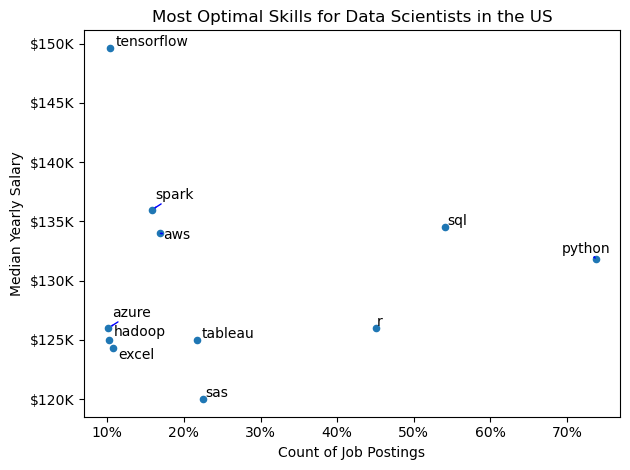

In [39]:
DS_job_count = len(df_DS_US)

df_DS_skills["skill_percent"] = (df_DS_skills["skill_count"]/ DS_job_count) * 100

skills_percent = 10

df_DS_skills_high_demand = df_DS_skills[df_DS_skills["skill_percent"] > skills_percent]


df_DS_skills_high_demand
from adjustText import adjust_text

df_DS_skills_high_demand.plot(kind="scatter", x = "skill_percent", y = "median_salary")

texts=[]
for i, txt in enumerate(df_DS_skills_high_demand.index):
    texts.append(plt.text(df_DS_skills_high_demand["skill_percent"].iloc[i], df_DS_skills_high_demand["median_salary"].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color="b", lw=1))

ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel("Count of Job Postings")
plt.ylabel("Median Yearly Salary")
plt.title("Most Optimal Skills for Data Scientists in the US")
plt.tight_layout()
plt.show()

In [42]:
df_technology = df["job_type_skills"].copy()

df_technology = df_technology.drop_duplicates()

df_technology = df_technology.dropna()

technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value
        else:
            technology_dict[key] = value

for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['spreadsheet',
  'sas',
  'esquisse',
  'powerpoint',
  'nuix',
  'microstrategy',
  'ssrs',
  'alteryx',
  'sheets',
  'tableau',
  'msaccess',
  'sharepoint',
  'word',
  'spss',
  'outlook',
  'qlik',
  'excel',
  'visio',
  'sap',
  'ms access',
  'powerbi',
  'power bi',
  'dax',
  'datarobot',
  'ssis',
  'cognos',
  'splunk',
  'looker'],
 'programming': ['c#',
  'perl',
  'cobol',
  'sas',
  'clojure',
  'scala',
  'powershell',
  'visualbasic',
  'c',
  'bash',
  'dart',
  'erlang',
  'go',
  'lisp',
  'mongodb',
  'matlab',
  'pascal',
  'apl',
  'html',
  'f#',
  'vb.net',
  'julia',
  'objective-c',
  'visual basic',
  'javascript',
  'assembly',
  'no-sql',
  'swift',
  'php',
  'kotlin',
  'haskell',
  'delphi',
  'shell',
  'solidity',
  'crystal',
  'mongo',
  'elixir',
  'vba',
  'r',
  'c++',
  'sass',
  'nosql',
  'css',
  'sql',
  'lua',
  'groovy',
  'java',
  't-sql',
  'python',
  'rust',
  'ocaml',
  'ruby',
  'typescript',
  'golang',
  'fort

In [45]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=["technology", "skills"])

df_technology = df_technology.explode("skills")

df_technology

,technology,skills
0,analyst_tools,spreadsheet
0,analyst_tools,sas
0,analyst_tools,esquisse
0,analyst_tools,powerpoint
0,analyst_tools,nuix
...,...,...
9,sync,microsoft teams
9,sync,zoom
9,sync,wire
9,sync,webex


In [47]:
df_plot = df_DS_skills_high_demand.merge(df_technology, left_on="job_skills", right_on="skills")

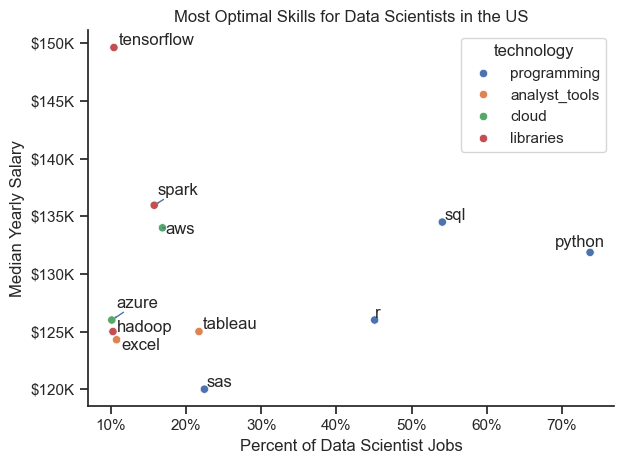

In [51]:

from adjustText import adjust_text


sns.scatterplot(
    data=df_plot,
    x = "skill_percent",
    y = "median_salary",
    hue = "technology"
)

sns.despine()
sns.set_theme(style="ticks")


texts=[]
for i, txt in enumerate(df_DS_skills_high_demand.index):
    texts.append(plt.text(df_DS_skills_high_demand["skill_percent"].iloc[i], df_DS_skills_high_demand["median_salary"].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color="b", lw=1))

ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel("Percent of Data Scientist Jobs")
plt.ylabel("Median Yearly Salary")
plt.title("Most Optimal Skills for Data Scientists in the US")
plt.tight_layout()
plt.show()